In [1]:
'''Предварительная подготовка данных включает в себя очистку, отбор экземпляров, нормализацию, преобразование данных, выделение признаков, отбор признаков.
Результатом предварительной обработки данных является конечный тренировочный набор.

Методы предварительной обработки данных:

Очистка данных используется для обнаружения, исправления или удаления ошибочных записей в наборе данных.
Нормализация данных используется для стандартизации диапазона значений независимых переменных или признаков данных (например, сведение к интервалам  [0,1]  или  [−1,+1] ).
Преобразование данных используется для приведения данных в формат, удобный для обработки и анализа.
Выделение признаков используется для преобразования входных данных в набор признаков, которые они хорошо представляют.
Уплотнение данных используется для преобразования числовых данных в исправленный, упорядоченный и упрощённый вид.
Это помогает уменьшить количество и/или размерность данных.'''

'Предварительная подготовка данных включает в себя очистку, отбор экземпляров, нормализацию, преобразование данных, выделение признаков, отбор признаков.\nРезультатом предварительной обработки данных является конечный тренировочный набор.\n\nМетоды предварительной обработки данных:\n\nОчистка данных используется для обнаружения, исправления или удаления ошибочных записей в наборе данных.\nНормализация данных используется для стандартизации диапазона значений независимых переменных или признаков данных (например, сведение к интервалам  [0,1]  или  [−1,+1] ).\nПреобразование данных используется для приведения данных в формат, удобный для обработки и анализа.\nВыделение признаков используется для преобразования входных данных в набор признаков, которые они хорошо представляют.\nУплотнение данных используется для преобразования числовых данных в исправленный, упорядоченный и упрощённый вид.\nЭто помогает уменьшить количество и/или размерность данных.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score, plot_roc_curve
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import confusion_matrix


In [3]:
# 1 шаг: Предварительная обработка данных

In [4]:
df = pd.read_csv('student_monnitoring_data.csv')

In [5]:
df.head()

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High


In [6]:
#удаляем признак Date и Student id. Так как наша задача - определить зависимость уровня стресса от привычек студента
df= df.drop(['Date'], axis = 1)
df= df.drop(['Student ID'], axis = 1)
df.head()

,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,9:00-15:00,Late,0.92,7.6,6,6,Low
1,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,11:00-14:00,Late,4.56,6.3,4,8,High
3,11:00-16:00,Late,3.07,9.0,2,10,Low
4,9:00-13:00,Absent,3.93,7.4,9,4,High


In [7]:
#Метод describe приводит общую статистику по конкретным полям таблицы.
#Посмотрим на общую статистику числовых данных.
df.describe()

,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.762538,6.996780,5.546867,5.471533
std,1.301927,1.150973,2.870323,2.868984
min,0.500000,5.000000,1.000000,1.000000
25%,1.640000,6.000000,3.000000,3.000000
50%,2.760000,7.000000,6.000000,5.000000
75%,3.900000,8.000000,8.000000,8.000000
max,5.000000,9.000000,10.000000,10.000000


In [8]:
#Проанализируем нечисловые данные.
df.describe(include=['O'])

,Class Time,Attendance Status,Risk Level
count,15000,15000,15000
unique,20,3,3
top,11:00-13:00,Late,High
freq,824,5032,8380


In [9]:
#Посмотрим типы полей и количество непустых записей
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class Time          15000 non-null  object 
 1   Attendance Status   15000 non-null  object 
 2   Stress Level (GSR)  15000 non-null  float64
 3   Sleep Hours         15000 non-null  float64
 4   Anxiety Level       15000 non-null  int64  
 5   Mood Score          15000 non-null  int64  
 6   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 820.4+ KB


In [10]:
#Проверим наличие недостающих значений.
df.isnull().sum()

Class Time            0
Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
dtype: int64

In [11]:
#Пропущенных значений нет

In [12]:
# названия столбцов
df.columns

Index(['Class Time', 'Attendance Status', 'Stress Level (GSR)', 'Sleep Hours',
       'Anxiety Level', 'Mood Score', 'Risk Level'],
      dtype='object')

In [13]:
# целевой признак - risk level
class_counts = df['Risk Level'].value_counts()
print(class_counts)

Risk Level
High      8380
Medium    3349
Low       3271
Name: count, dtype: int64


Text(0.5, 1.0, 'Распределение данных целевого признака')

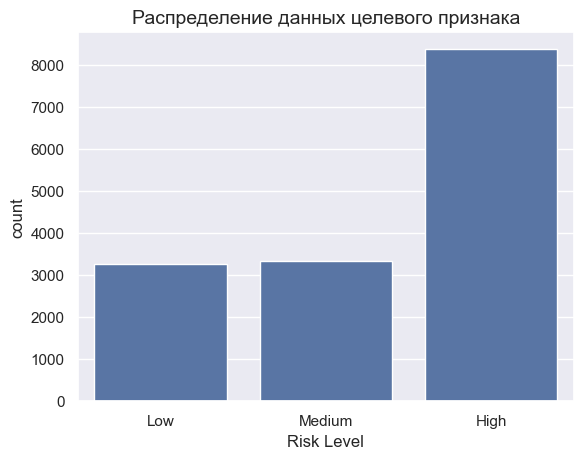

In [14]:
# строим гистограмму целевой переменной:
sns.countplot(x = df['Risk Level'])

plt.title('Распределение данных целевого признака', fontsize=14)
#Данных, относящихся к высокому уровню риска, больше всего

In [15]:
# Больше информации мы можем получить из визуализации взаимосвязи пар признаков.
# Проанализировать полученные визуализации

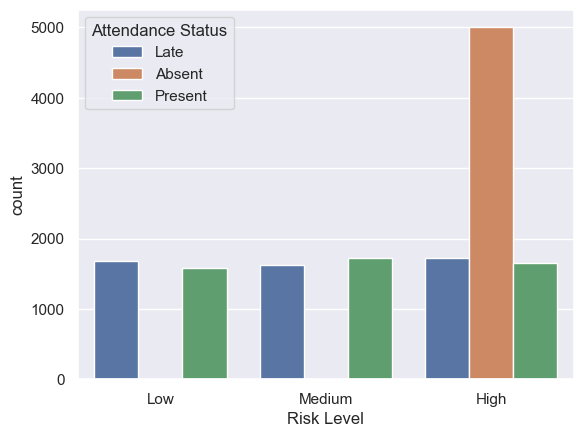

In [16]:
sns.countplot(data=df, x="Risk Level", hue='Attendance Status');

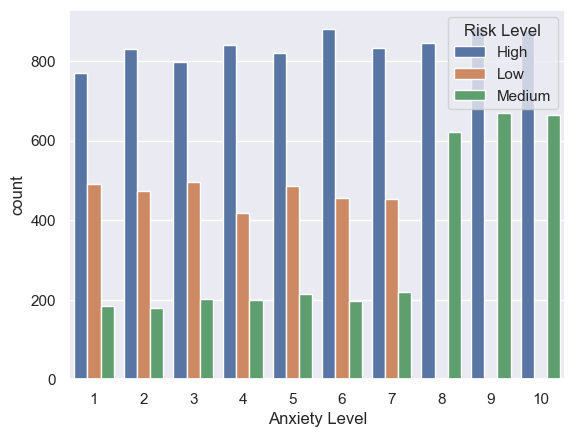

In [17]:
sns.countplot(data=df, x="Anxiety Level", hue='Risk Level');

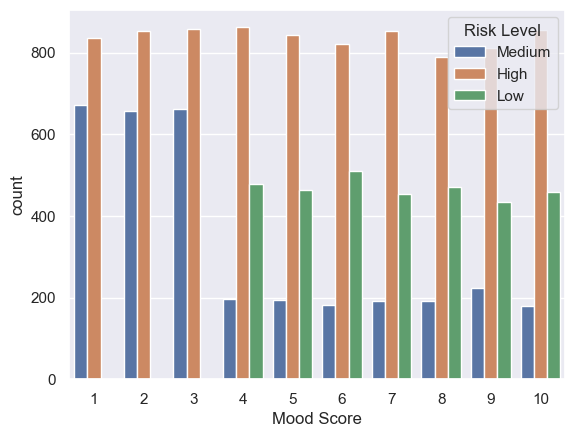

In [18]:
sns.countplot(data=df, x="Mood Score", hue='Risk Level');

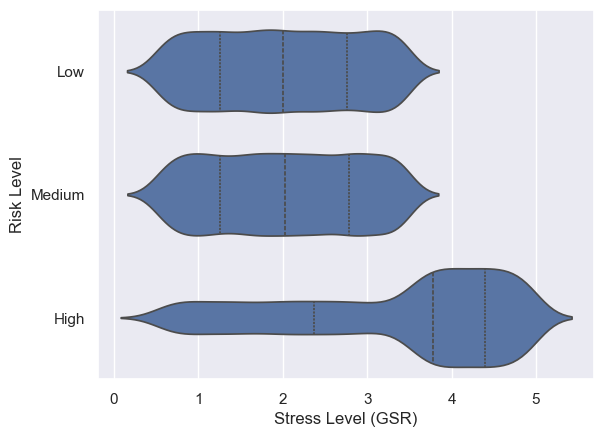

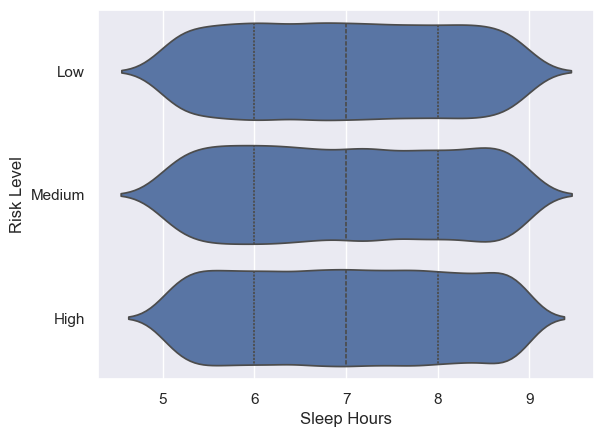

In [19]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:
# Проанализировать!
sns.violinplot(y='Risk Level', x='Stress Level (GSR)', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Risk Level', x='Sleep Hours', data=df, inner='quartile')
plt.show()

In [20]:
#Кодирование категориальных признаков

In [21]:
df['Attendance Status'] = df['Attendance Status'].map({'Present': 1, 'Absent': 0, 'Late': 2})
df['Risk Level'] = df['Risk Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [22]:
#для кодирования Class Time признака используем LabelEncoder так как много уникальных значений
df['Class Time'] = LabelEncoder().fit_transform(df['Class Time'])

In [23]:
df.head()

,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,18,2,0.92,7.6,6,6,0
1,14,2,1.17,6.0,6,2,1
2,7,2,4.56,6.3,4,8,2
3,9,2,3.07,9.0,2,10,0
4,16,0,3.93,7.4,9,4,2


In [24]:
#Нормализация

In [25]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler
scaler_mm = MinMaxScaler()
df[['Stress Level (GSR)']] = scaler_mm.fit_transform(df[['Stress Level (GSR)']])
df[['Sleep Hours']] = scaler_mm.fit_transform(df[['Sleep Hours']])
df[['Anxiety Level']] = scaler_mm.fit_transform(df[['Anxiety Level']])
df[['Mood Score']] = scaler_mm.fit_transform(df[['Mood Score']])

df.head()

,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,18,2,0.093333,0.650,0.555556,0.555556,0
1,14,2,0.148889,0.250,0.555556,0.111111,1
2,7,2,0.902222,0.325,0.333333,0.777778,2
3,9,2,0.571111,1.000,0.111111,1.000000,0
4,16,0,0.762222,0.600,0.888889,0.333333,2


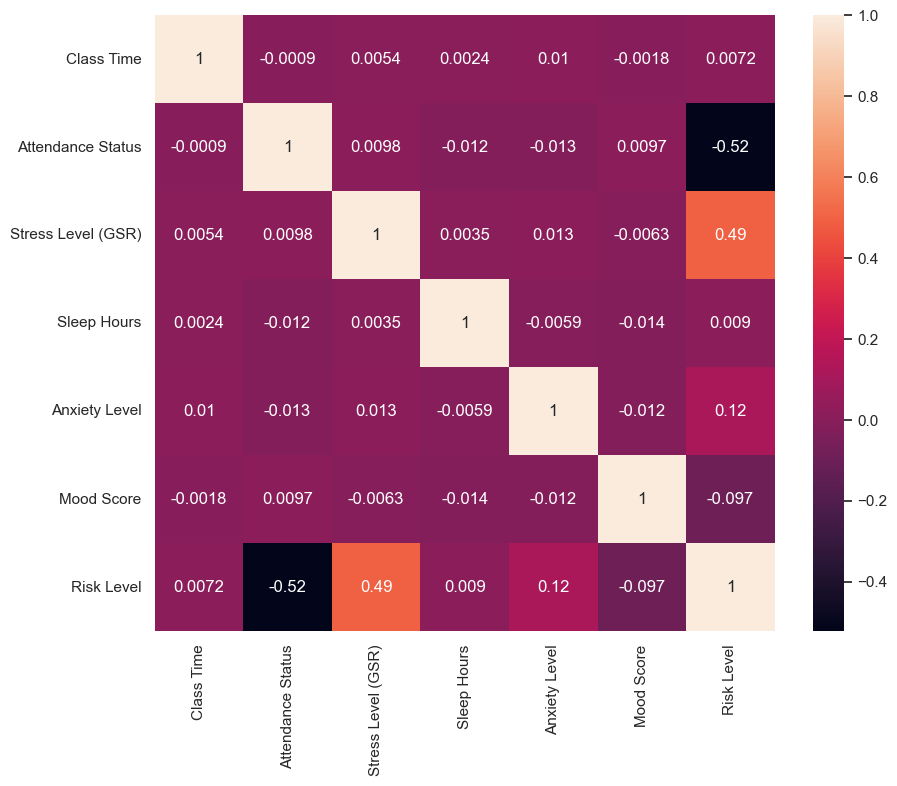

In [26]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method = 'spearman', numeric_only = True), annot=True)
plt.show()

In [27]:
#Уровень риска коррелирует с уровнем стресса (stress level) и обратно коррелирует с посещаемостью (attendance status). 
#У остальных признаков корреляции между собой не наблюдается

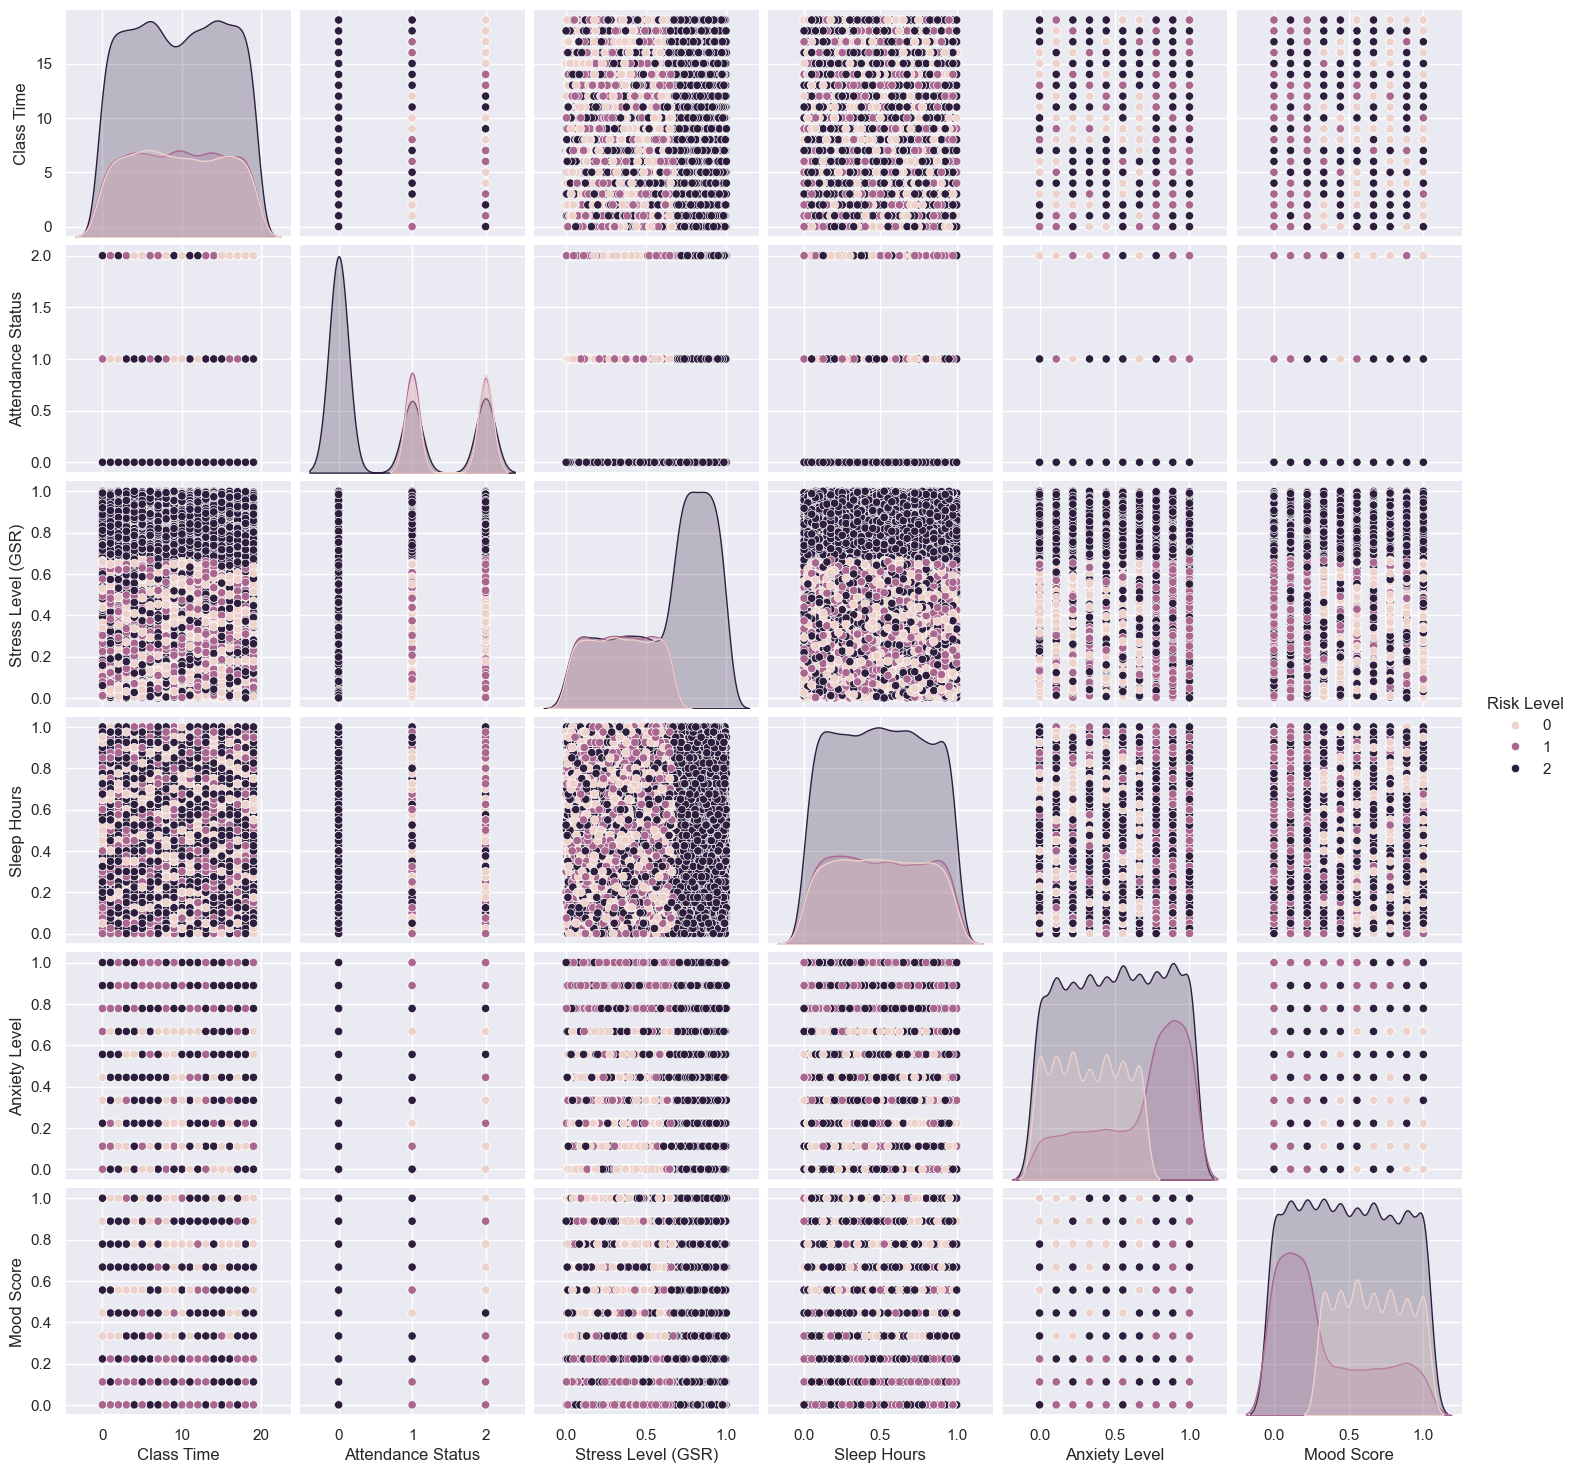

In [28]:
sns.pairplot(df, kind="scatter", hue="Risk Level");

In [29]:
# Из попарных графиков сказать ничего нельзя

In [30]:
#Построение модели
#2 шаг: Разделение набора данных
#Y - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич. 
#В нашем случае это столбец risk level.

#В X складываем весь набор данных без целевой переменной.

In [31]:
X = df.drop(['Risk Level'], axis=1)
y = df['Risk Level']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (15000, 6) | y shape: (15000,) 


In [32]:
#Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(),
#мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [33]:
# 3 Шаг: выбор оптимальной модели

#Далее попробуем следующие алгоритмы:

#Logistic Regression (LR)
#Linear Discriminant Analysis (LDA)
#K-Nearest Neighbors (KNN)
#GradientBoostingClassifier(GBC)
#Gaussian Naive Bayes (NB)
#Support Vector Machines (SVM)

In [34]:
# создаем лист для тех моделей, которые будем изучать
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('GBC', GradientBoostingClassifier()))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.801417 (0.007370)
LDA: 0.802000 (0.007474)
KNN: 0.917417 (0.004174)
NB: 0.877750 (0.010548)
SVC: 0.931167 (0.006843)
GBC: 1.000000 (0.000000)


In [35]:
'''
Будем использовать GradientBoostingClassifier - градиентный бустинг. Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.

'''

## call model
model = ensemble.GradientBoostingClassifier()

'\n## define hyperparameters combinations to try\nparam_dic = {\'learning_rate\':[0.15,0.1,0.05],     #весовой коэффициент для поправок по новым деревьям при добавлении в модель\n             \'n_estimators\':[100,250,500],  #количество деревьев, добавленных в модель\n             \'max_depth\':[2,3,4,5],    #максимальная глубина дерева\n             \'min_samples_split\':[2,4,6],    #задает минимальное количество выборок для разделения\n             \'min_samples_leaf\':[1,3,5],     #минимальное количество выборок для формирования листа\n             \'max_features\':[2,3,4],     #квадратный корень из функций обычно является хорошей отправной точкой\n             \'subsample\':[0.7,0.8,0.9,1]}       #образцы, которые будут использоваться для подгонки индивидуального базового файла\n## random search(Рандомизированный поиск по гиперпараметрам.)\nrandom_search = model_selection.RandomizedSearchCV(model,\n                                                   param_distributions=param_dic, n_

In [36]:
# 4 шаг: обучение модели
moddel =  GradientBoostingClassifier() #Определяем нашу модель GradientBoostingClassifier
model.fit(X_train, y_train) #После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit()
predicted_prob = model.predict_proba(X_test) #прогнозирование
predicted = model.predict(X_test).astype('int32')

In [37]:
'''
смотрим, что получили
А получили мы для каждого объекта - вектор вероятностей отнесения этого объекта к классам 
'''
predicted_prob

array([[2.45910770e-05, 9.99947498e-01, 2.79104649e-05],
       [3.92295402e-07, 9.99998794e-01, 8.13926538e-07],
       [3.82766254e-07, 4.00714862e-07, 9.99999217e-01],
       ...,
       [9.99972847e-01, 1.29493032e-05, 1.42039366e-05],
       [9.99972847e-01, 1.29493032e-05, 1.42039366e-05],
       [2.45910770e-05, 9.99947498e-01, 2.79104649e-05]])

In [38]:
#5 шаг: оценка модели

In [46]:

#Выведем Основные метрики для оценки 

accuracy = metrics.accuracy_score(y_test, predicted) #Оценим точность классификации.

auc = metrics.roc_auc_score(y_test, predicted_prob,  multi_class='ovo',average= "weighted") #возвращаем долю правильно классифицированных выборок.
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision:", round(precision,2))
#Выведем Основные метрики для оценки 
f1 = f1_score(y_test, predicted, average='weighted')
print(f'F1 Score: {f1:.2f}')
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 1.0
Auc: 1.0
Recall (all 1s predicted right): 1.0
Precision: 1.0
F1 Score: 1.00
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       685
           2       1.00      1.00      1.00      1667

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



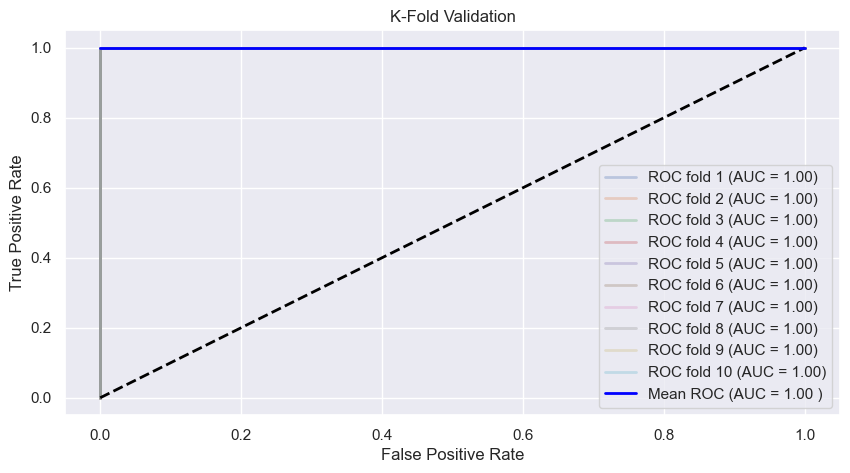

In [40]:
'''
Строим ROC кривые
'''
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    '''
iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
используя указанные значения индекса
X_train - это весь экземпляр с атрибутами,
y_train - это метка каждого экземпляра.
train_selected_test - Разделяет массивы / матрицы на случайные тестовые подмножества.

'''
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
'''
Получим результат
'''
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
'''
построим график

'''
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

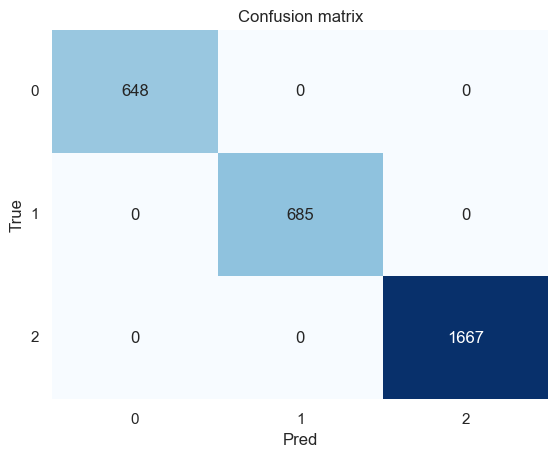

In [41]:
'''
Confusion matrix (Мультиклассовый)
'''

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
'''
построим график

'''

plt.show()

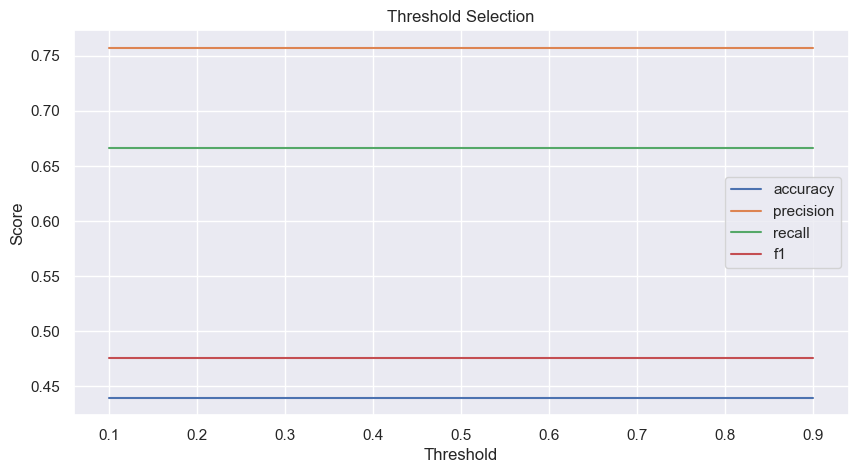

In [47]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))
'''
Добавим линии
'''
## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)
'''
отрисовываем
'''

plt.show()